In [1]:
import pandas as pd
import numpy as np

# Graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import matplotlib.dates as mdates

# rc('text', usetex=True)
# rc('text.latex', preamble=r'\usepackage{cmbright}')
# rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

# Magic function to make matplotlib inline;
%matplotlib inline

# This enables SVG graphics inline. 
# There is a bug, so uncomment if it works.
# %config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [2]:
df = pd.read_csv('../simulation_output/run2/sim2.csv')

In [3]:
df.head()

,n,delta,p,corr_p
0,100,0,0.12,0.12
1,100,0,0.18,0.18
2,100,0,0.17,0.17
3,100,0,0.18,0.18
4,100,0,0.18,0.18


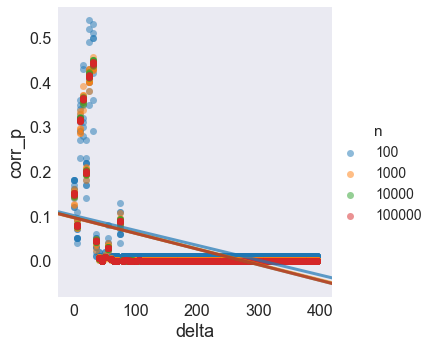

In [4]:
sns.lmplot(data=df, x='delta', y='corr_p', hue='n', ci=None, scatter_kws={'alpha':0.5}, line_kws={'alpha':0.7})

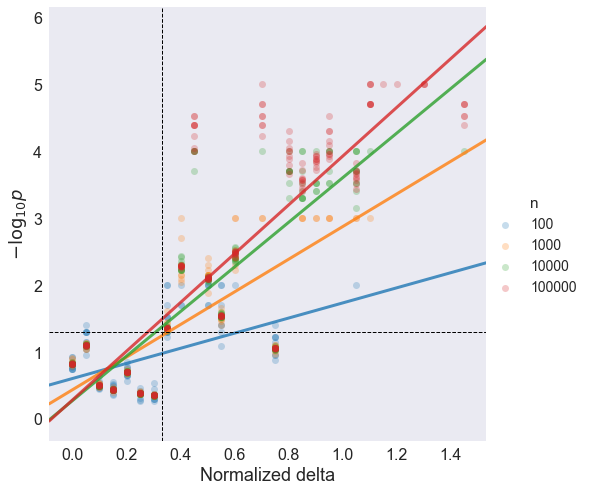

In [5]:
def saturated(x):
    if x.p == 0:
        return True
    else:
        return False

df['log_p'] = -df.corr_p.apply(np.log10)
df['saturated'] = df.apply(saturated, axis=1)
df['norm_delta'] = df.delta/100

sns.lmplot(x='norm_delta', y='log_p', hue='n', data=df[df.saturated == False],
           ci=None, scatter_kws={'alpha':0.25}, line_kws={'alpha':0.8}, robust=True, size=7)
plt.axhline(-np.log10(0.05), ls='--', lw=1, color='k')
plt.axvline(.333, ls='--', lw=1, color='k')

plt.xlabel('Normalized delta')
plt.ylabel('$-\log_{10}p$')

In [6]:
df[df.saturated == False][df[df.saturated == False]['n']==100].head()

,n,delta,p,corr_p,log_p,saturated,norm_delta
0,100,0,0.12,0.12,0.920819,False,0.0
1,100,0,0.18,0.18,0.744727,False,0.0
2,100,0,0.17,0.17,0.769551,False,0.0
3,100,0,0.18,0.18,0.744727,False,0.0
4,100,0,0.18,0.18,0.744727,False,0.0


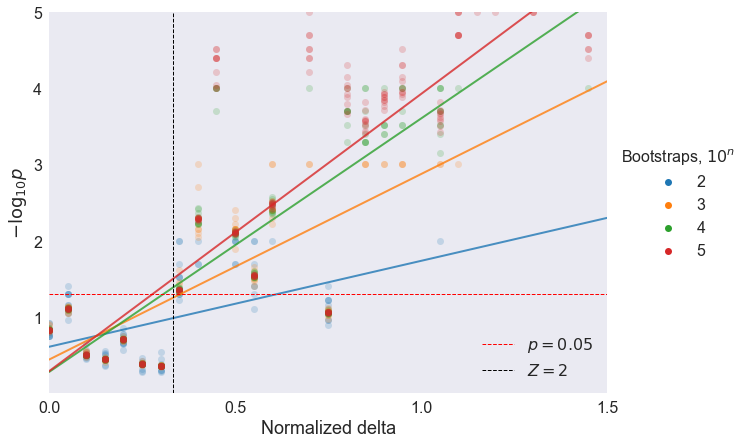

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
plt.xlim(0.0, 1.5)
plt.ylim(0,5)

for n in df.n.unique():
    sns.regplot(x='norm_delta', y='log_p', data=df[df.saturated == False][df[df.saturated == False]['n']==n],
           ci=None, scatter_kws={'alpha':0.2}, line_kws={'alpha':0.8, 'lw':2}, robust=True, label=int(np.log10(n)))
    
l1 = plt.axhline(-np.log10(0.05), ls='--', lw=1, color='red')
l2 = plt.axvline(.333, ls='--', lw=1, color='k', label='')
leg1 = plt.legend([l1, l2], [r"$p=0.05$", r"$Z=2$"], fontsize=16)
plt.gca().add_artist(leg1)

leg2 = plt.legend(title='Bootstraps, $10^n$', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
plt.setp(leg2.get_title(),fontsize='16')
for lh in leg2.legendHandles: 
    lh.set_alpha(1)
    

    
plt.xticks([0.0, 0.5, 1.0, 1.5])
plt.yticks([1,2,3,4,5])

plt.xlabel('Normalized delta')
plt.ylabel('$-\log_{10}p$')

plt.savefig('../simulation_output/plots/run2_sim2.svg', bbox_inches='tight')